In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Load job market
df = pd.read_csv('job-market.csv')

df["Date"] = df["Date"].replace(to_replace=r'T.*', value='', regex=True)
df["Date"] = pd.to_datetime(df["Date"])
df["AverageSalary"] = (df["LowestSalary"] + df["HighestSalary"])/2 

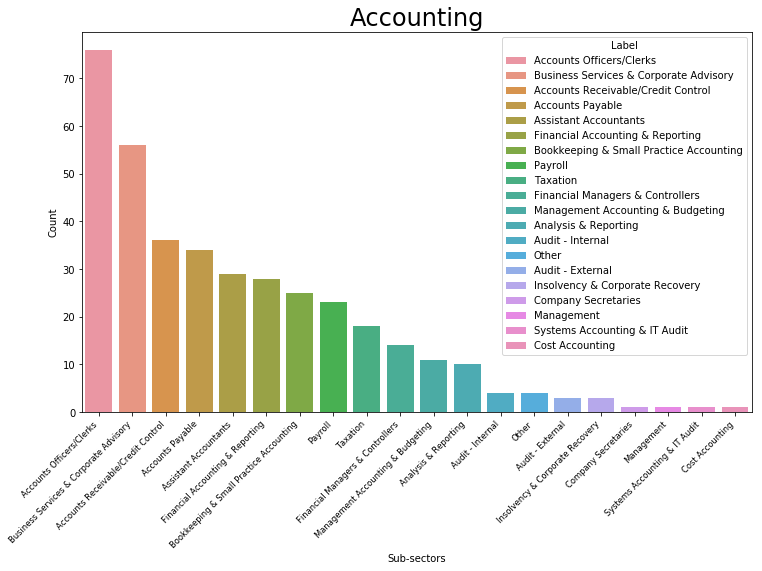

In [2]:
df_account = df[df["Classification"] == "Accounting"]
df_account_subclassifications = df_account.groupby('SubClassification').count()
df_account_subclassifications['Label'] = df_account_subclassifications.index
df_account_subclassifications['Count'] = df_account_subclassifications["Id"]
df_account_subclassifications = df_account_subclassifications.sort_values(by=['Count'], ascending = False)

plt.figure(figsize=(12,7))
barChart = sns.barplot(x='Label', y='Count', hue='Label', data=df_account_subclassifications, dodge=False)
barChart.set_xticklabels(
    barChart.get_xticklabels(), 
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='small'
)

plt.title('Accounting', {'fontsize': '24' })
plt.xlabel('Sub-sectors')
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


Text(0.5, 1.0, 'Job postings by date')

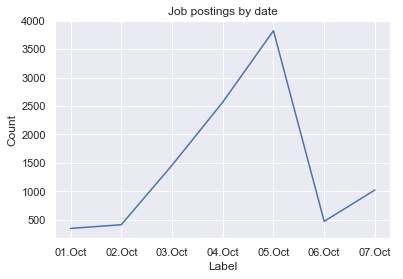

In [3]:
df_monthly_counts = df[df["Date"].isna()==False]
df_monthly_counts["DayOfMonth"] =  [x.strftime("%d.%b") for x in df_monthly_counts["Date"]]

df_monthly_counts = df_monthly_counts.groupby('DayOfMonth').count()
df_monthly_counts['Label'] = df_monthly_counts.index
df_monthly_counts['Count'] = df_monthly_counts["Id"]
#switch to sea born default
sns.set()
sns.lineplot(x="Label", y="Count", data=df_monthly_counts)
plt.title("Job postings by date")

Text(0.5, 0, 'Sub-sectors')

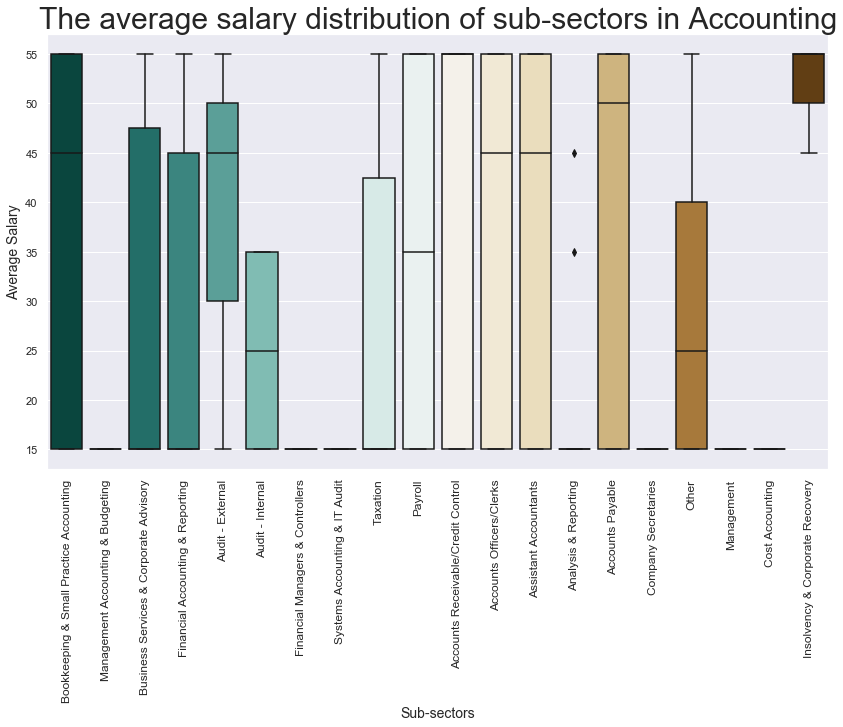

In [4]:
df_account = df[df["Classification"] == "Accounting"]
plt.figure(figsize=(14,8))
box_plt_high = sns.boxplot(x='SubClassification',y='AverageSalary',data=df_account, palette='BrBG_r')
box_plt_high.set_xticklabels(box_plt_high.get_xticklabels(),rotation=90,fontsize=12)
plt.title('The average salary distribution of sub-sectors in Accounting',size=30)
plt.ylabel('Average Salary',fontsize=14)
plt.xlabel('Sub-sectors',fontsize=14)